In [2]:
# Importación de paquetes necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *


In [3]:
# Lectura del dataset
data = pd.read_csv('Turbine_Data.csv', parse_dates=['Unnamed: 0'], index_col=['Unnamed: 0'])
data.index = pd.to_datetime(data.index)


In [4]:
# Eliminación de duplicados
data.drop_duplicates(inplace=True)

In [5]:
# Eliminación de columnas innecesarias
data.drop(['ControlBoxTemperature', 'WTG'], axis=1, inplace=True)

In [6]:
# Filtrado de filas con valores no negativos en 'ActivePower'
data = data[data['ActivePower'] >= 0]


In [7]:
# Verificación de valores faltantes
missing_values = data.isna().sum()
print("Valores faltantes:\n", missing_values)

Valores faltantes:
 ActivePower                         0
AmbientTemperatue                1032
BearingShaftTemperature         26821
Blade1PitchAngle                43282
Blade2PitchAngle                43365
Blade3PitchAngle                43365
GearboxBearingTemperature       26819
GearboxOilTemperature           26806
GeneratorRPM                    26810
GeneratorWinding1Temperature    26792
GeneratorWinding2Temperature    26785
HubTemperature                  26930
MainBoxTemperature              26841
NacellePosition                 20429
ReactivePower                      42
RotorRPM                        26816
TurbineStatus                   26466
WindDirection                   20429
WindSpeed                         308
dtype: int64


In [8]:
# Imputación o eliminación de valores faltantes si es necesario
# En este caso, vamos a eliminar filas con valores faltantes
data.dropna(inplace=True)

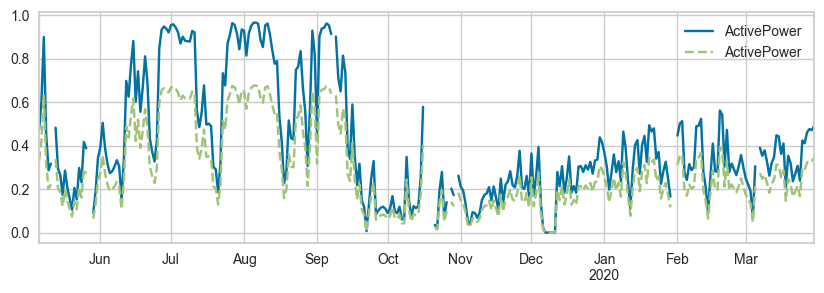

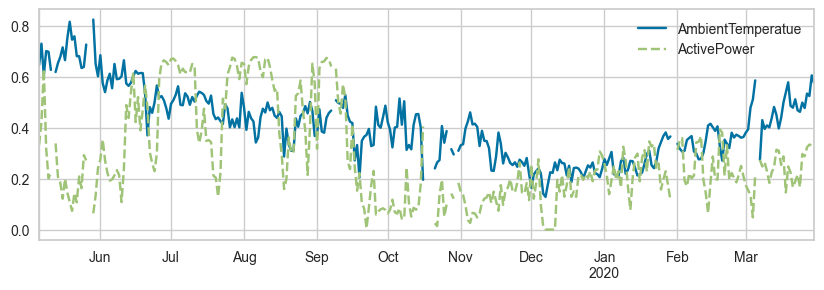

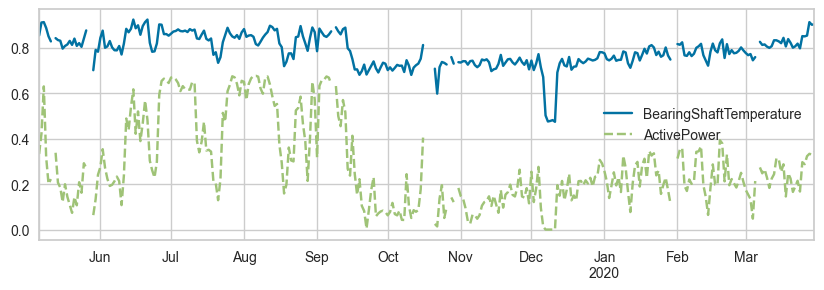

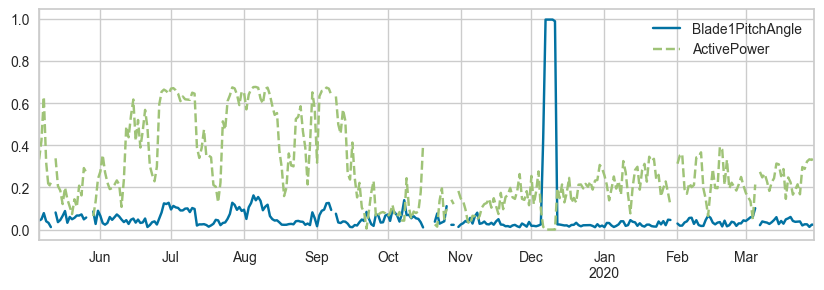

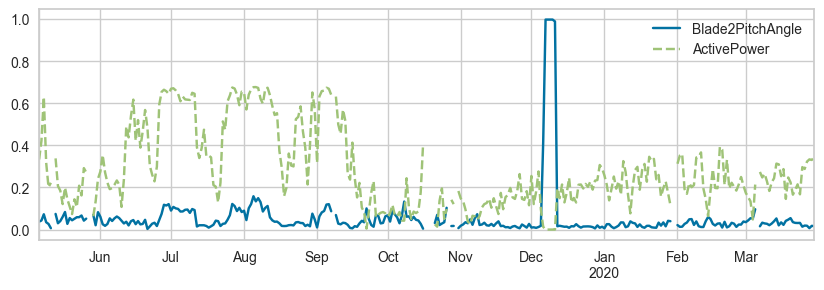

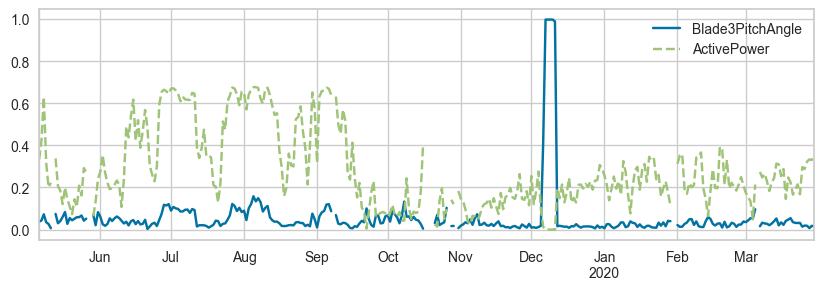

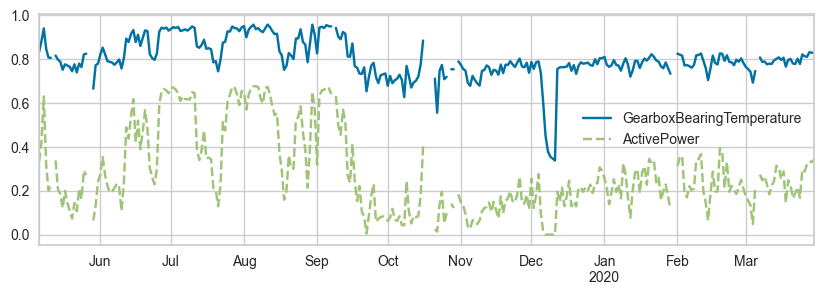

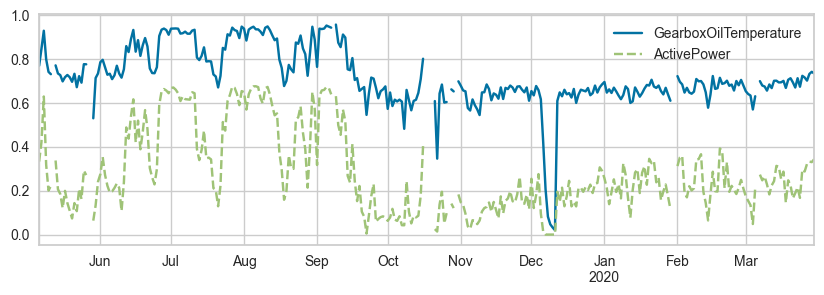

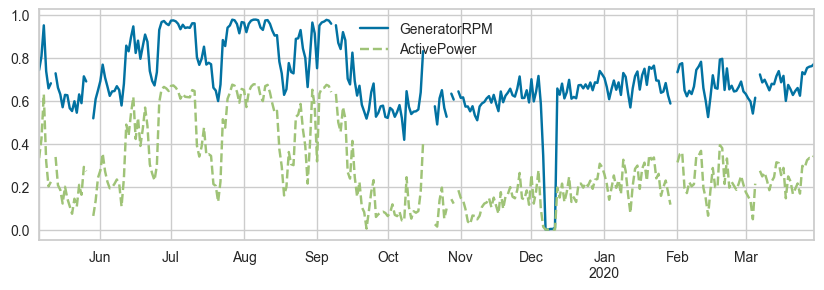

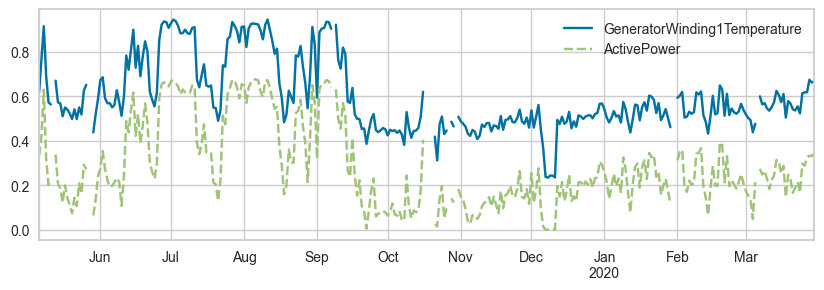

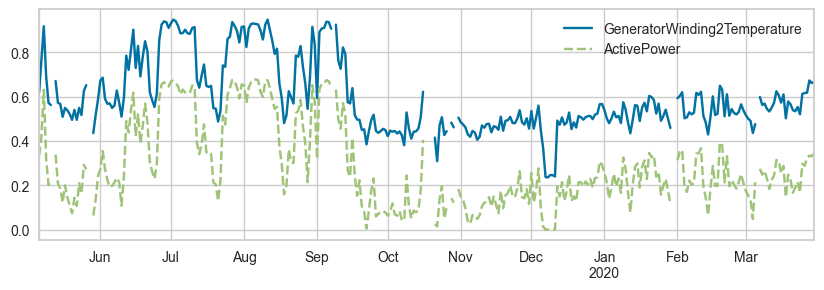

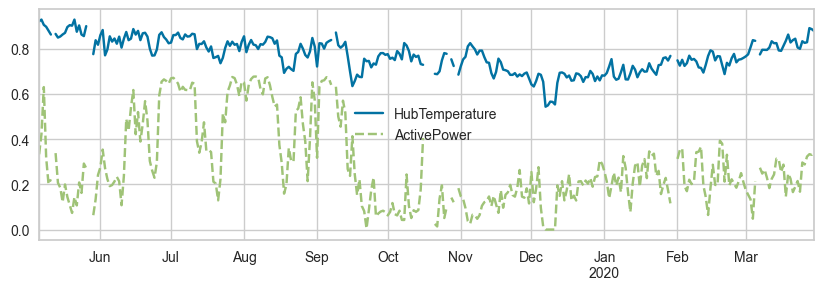

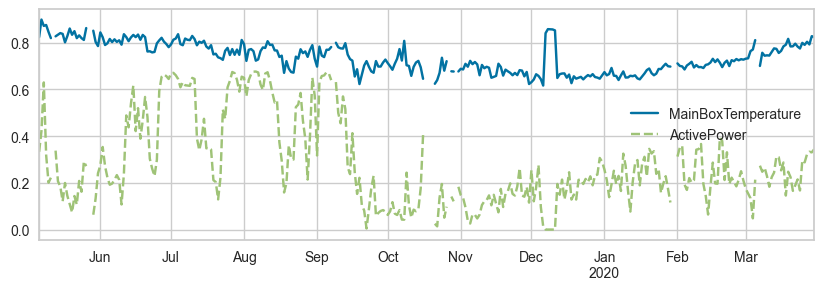

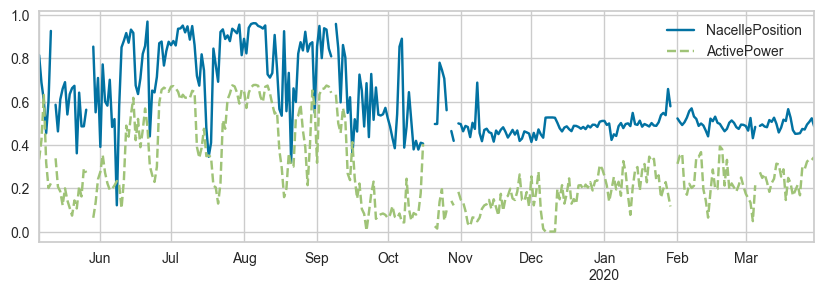

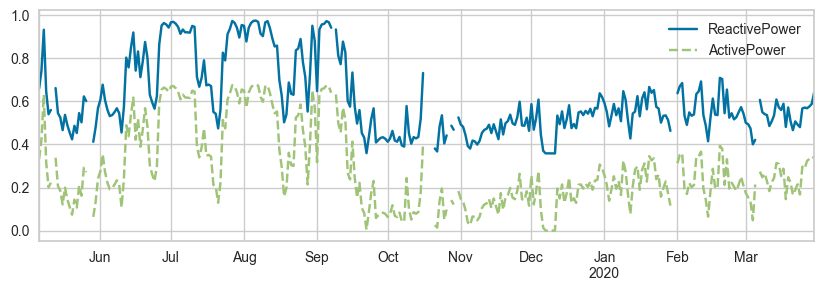

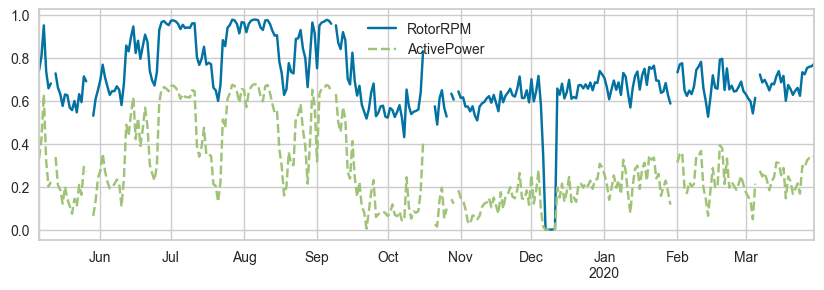

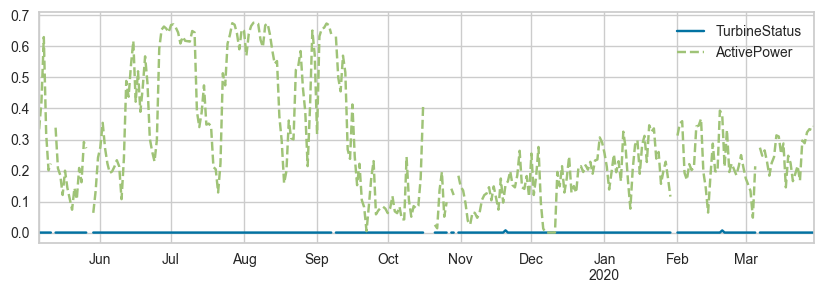

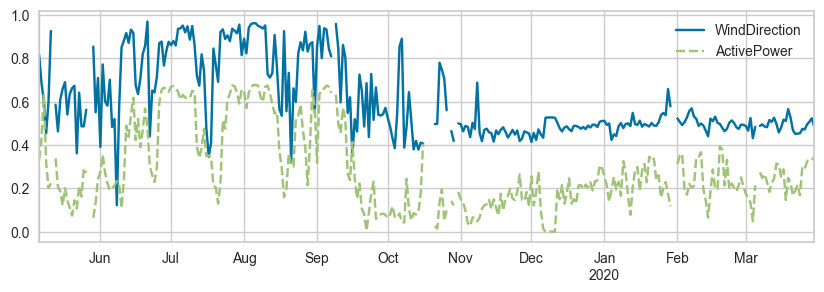

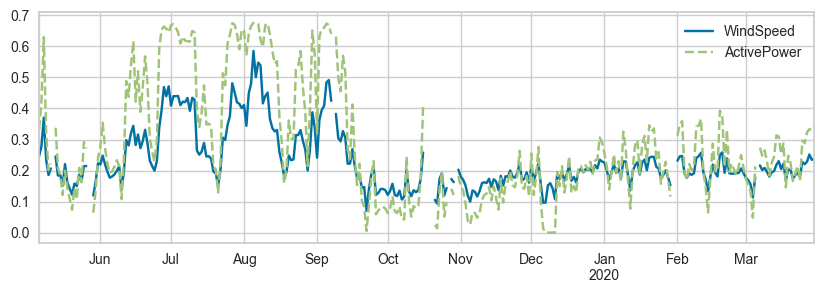

In [9]:
# Normalización de los datos para visualización (no es necesario para el modelo PyCaret)
d2 = data.copy()
for i in data.columns:
    mini = min(d2[i])
    maxi = max(d2[i])
    d2[i] = (d2[i] - mini) / (maxi - mini)

    plt.figure(figsize=(10,3))
    d2[i].resample('D').mean().plot(legend=i)
    (d2['ActivePower']*0.7).resample('D').mean().plot(style='--', legend='ActivePower')
    plt.legend()
    plt.show()

In [10]:
# Configuración de PyCaret para regresión
# Inicializar el entorno de PyCaret
regression_setup = setup(data, target='ActivePower', session_id=123)

,Description,Value
0,Session id,123
1,Target,ActivePower
2,Target type,Regression
3,Original data shape,"(27463, 19)"
4,Transformed data shape,"(27463, 19)"
5,Transformed train set shape,"(19224, 19)"
6,Transformed test set shape,"(8239, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [11]:
# Comparar modelos y seleccionar el mejor
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.5250,200.1618,14.0490,0.9994,0.1428,82.1777,1.1700
rf,Random Forest Regressor,7.2646,237.0287,15.0219,0.9993,0.1416,32.4120,2.4370
lightgbm,Light Gradient Boosting Machine,7.8951,225.7265,14.8419,0.9993,0.1799,26.1791,0.0980
dt,Decision Tree Regressor,10.0096,437.1299,20.4770,0.9987,0.1882,29.2089,0.0500
gbr,Gradient Boosting Regressor,11.8488,481.6986,21.8086,0.9986,0.2427,40.3000,1.2190
knn,K Neighbors Regressor,14.2675,910.7955,29.7355,0.9973,0.2627,5.9109,0.0350
ada,AdaBoost Regressor,39.9382,2344.9709,48.3763,0.9931,0.7305,108.6786,0.3780
ridge,Ridge Regression,51.5332,5882.3892,76.6601,0.9827,0.7404,313.0194,0.0120
lr,Linear Regression,51.1946,6045.4654,77.7126,0.9823,0.6967,305.2543,0.4500
lasso,Lasso Regression,51.2276,6224.6752,78.8606,0.9817,0.7006,274.5240,0.3200


In [14]:
# Crear un modelo específico (por ejemplo, XGBoost)
et_model = create_model('et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.8753,317.7220,17.8248,0.9990,0.1273,0.0598
1,6.8002,135.6961,11.6489,0.9996,0.1211,0.0603
2,7.5415,184.2565,13.5741,0.9995,0.1274,0.0675
3,7.4558,169.5343,13.0205,0.9995,0.1578,0.0830
4,7.6172,194.1913,13.9353,0.9994,0.1163,0.0518
5,7.7260,209.2157,14.4643,0.9994,0.1514,0.1093
6,7.4211,157.2389,12.5395,0.9995,0.1185,0.0581
7,7.7391,235.1839,15.3357,0.9993,0.1765,820.8680
8,7.2817,168.0654,12.9640,0.9995,0.1741,0.1632


In [15]:
# Evaluar el modelo
evaluate_model(et_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [23]:
# Guardar el modelo para su uso futuro
save_model(et_model, 'best_et_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['AmbientTemperatue',
                                              'BearingShaftTemperature',
                                              'Blade1PitchAngle',
                                              'Blade2PitchAngle',
                                              'Blade3PitchAngle',
                                              'GearboxBearingTemperature',
                                              'GearboxOilTemperature',
                                              'GeneratorRPM',
                                              'GeneratorWinding1Temperature',
                                              'GeneratorWinding2Temperature',
                                              'HubTemperature',
                                              'MainBoxTemperature',
                                              'NacellePosition', 'ReactivePower',
     